In [16]:
import requests
from pprint import pprint
from PIL import Image
import os
import shutil
import cv2
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def process_image(input_path):
    #img = cv2.imread(input_path)
    
    #img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

    # equalize the histogram of the Y channel
    #img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0]) #cv2.equalizeHist(img_yuv[:,:,0])

    # convert the YUV image back to RGB format
    #img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    #cv2.imwrite(temp_image_path, img_output) 
    
    with open(input_path, 'rb') as f:
        r = requests.post('http://127.0.0.1:5000/api/v1/segmentation/opticdisk', files = {'file': ('0792_test.tif', f, 'image/tiff', {'Expires': '0'})})
        print(r)    
        if r.status_code != 200:
            raise ValueError("Unexpected result")
            
        outputFileName = r.content
        return outputFileName

In [5]:
def read_gif_by_cv2(pathIn):
    cap = cv2.VideoCapture(pathIn)
    ret, image = cap.read()
    cap.release()
    return image

In [6]:
def load_from_pickle(pathIn):
    ar_file = open(pathIn, "rb")
    res = pickle.load(ar_file)
    ar_file.close()
    return res

In [7]:
def dump_to_pickle(obj, target_path):
    target_file = open(target_path, 'wb')
    pickle.dump(obj, target_file)
    target_file.close()

In [33]:
def compare_images_cv2_fast(cv2image1, cv2image2):
    
    rows1,cols1 = cv2image1.shape
    rows2,cols2 = cv2image2.shape
    
    if rows1 != rows2 or cols1 != cols2:
        print(cv2image1.shape)
        print(cv2image2.shape)
        print(rows1)
        print(rows2)
        print(cols1)
        print(cols2)
        raise ValueError("Images have different size")
        
    cv2image1int = cv2image1.astype(int)
    cv2image2int = cv2image2.astype(int)
    
    all_count = cv2image1int.shape[0] * cv2image1int.shape[1]
    diff = (cv2image1int - cv2image2int)
    diff = np.abs(diff)
    diff_sum = diff.sum() / (255)
    
    equal_count = (np.sign(cv2image1int.astype(int) - cv2image2.astype(int)) == 0).astype(int).sum()
    
    return (equal_count, diff_sum, all_count, equal_count + diff_sum)

In [26]:
input_dir = 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/'
expected_result_dir = 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/'

In [27]:
output_dir = 'd:/Dane/test_out/'

In [30]:
files = os.listdir(input_dir)
res_map = {}
for file_name in files:
    expected_result_file = file_name
    full_file_name = input_dir + file_name
    expected_result_file = expected_result_file.replace('_training.tif', '_manual1.gif')
    full_expected_result_file = expected_result_dir + expected_result_file
    output_file = process_image(full_file_name)
    res_map[file_name] = (full_file_name, output_file, full_expected_result_file)
    print(res_map[file_name])

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0001_training.tif', b'd:/Fundus/uploads\\6f21de98-40da-4f56-b811-317c54a58aee.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0001_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0002_training.tif', b'd:/Fundus/uploads\\ffee3689-50a4-40df-9dea-0a1449d9db7e.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0002_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0003_training.tif', b'd:/Fundus/uploads\\461e1d15-e85a-4c85-bb82-49b1398156a3.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0003_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0004_training.tif', b'd:/Fundus/uploads\\88f1c395-05ea-4d73-920c-8d1263dac852.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0033_training.tif', b'd:/Fundus/uploads\\bc68b0cf-9646-43ed-b725-b9fcb513b2a0.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0033_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0034_training.tif', b'd:/Fundus/uploads\\b8af901a-899d-49f5-bc98-8a1fa3136cc5.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0034_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0035_training.tif', b'd:/Fundus/uploads\\c0f91170-e8d8-4b4e-ab41-1f80da8f2d82.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0035_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0036_training.tif', b'd:/Fundus/uploads\\eb9d732e-d56b-4125-b8e6-ef680148fdc6.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0065_training.tif', b'd:/Fundus/uploads\\934db741-1f0d-4139-a59a-9799680ae0aa.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0065_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0066_training.tif', b'd:/Fundus/uploads\\3614dba7-0794-421e-a948-3a6e8691682d.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0066_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0067_training.tif', b'd:/Fundus/uploads\\9af50dce-8e92-48c5-b58b-074cd2835a27.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0067_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0068_training.tif', b'd:/Fundus/uploads\\bf613954-2394-46fa-b5e9-b448979977cb.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0097_training.tif', b'd:/Fundus/uploads\\d601498d-f2fc-4d18-b090-5c722f3519e9.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0097_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0098_training.tif', b'd:/Fundus/uploads\\3f924c3b-b8aa-4ef7-9bd0-3b95ed0f05ac.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0098_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0099_training.tif', b'd:/Fundus/uploads\\cb88176d-72d8-4d19-a07c-cccb8cb068e5.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0099_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0100_training.tif', b'd:/Fundus/uploads\\edbd31eb-d433-4951-a07f-d960d7ab6f95.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0129_training.tif', b'd:/Fundus/uploads\\eaf775f6-734f-4677-805e-0fd45e744ba8.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0129_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0130_training.tif', b'd:/Fundus/uploads\\7756f096-0690-4a61-b46e-cd740f656036.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0130_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0131_training.tif', b'd:/Fundus/uploads\\af4c00e8-d6b4-4a81-83da-1317ee1030b8.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0131_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0132_training.tif', b'd:/Fundus/uploads\\0e2d271a-57cc-4a1a-9514-ae87d92ae707.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0161_training.tif', b'd:/Fundus/uploads\\2c3502e5-177b-4708-8da8-68907b910eff.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0161_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0162_training.tif', b'd:/Fundus/uploads\\1a50acfe-4e62-435a-aaf5-c8811353bdfa.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0162_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0163_training.tif', b'd:/Fundus/uploads\\7edb10ab-fa3d-4467-a5df-24757753e4f3.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0163_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0164_training.tif', b'd:/Fundus/uploads\\f7970ed9-5cef-4d6e-b221-62e1d956f0f6.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0193_training.tif', b'd:/Fundus/uploads\\610c85d5-6d4a-4bc2-9297-b5d3faa4f980.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0193_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0194_training.tif', b'd:/Fundus/uploads\\ee5fec57-2e7b-4c4b-97c7-f4803411cea2.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0194_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0195_training.tif', b'd:/Fundus/uploads\\fd7d3033-cf8f-42cb-9ddd-33bee7aa92e9.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0195_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0196_training.tif', b'd:/Fundus/uploads\\64ee4783-3a01-4e1a-b2e6-c5470ed3aae3.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0225_training.tif', b'd:/Fundus/uploads\\eaca7efc-af81-4ee0-8701-42744b064afa.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0225_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0226_training.tif', b'd:/Fundus/uploads\\61d8ef9c-99bf-4d2b-8ad6-9b6044d3064d.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0226_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0227_training.tif', b'd:/Fundus/uploads\\d8b2d2f5-e770-491a-b4ec-4d4b0eab2a48.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0227_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0228_training.tif', b'd:/Fundus/uploads\\b8bb124c-7ad8-4ba1-8c5e-5a29f1c3f75d.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0257_training.tif', b'd:/Fundus/uploads\\540bdc7b-f648-49a1-bc91-05aa63029699.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0257_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0258_training.tif', b'd:/Fundus/uploads\\e9fff868-5ebd-4402-9eed-c0209ff65ecb.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0258_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0259_training.tif', b'd:/Fundus/uploads\\25e974d1-37bb-423b-ad87-abeb36b76bb6.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0259_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0260_training.tif', b'd:/Fundus/uploads\\f3a6e178-3800-42b9-ba37-3f715c8bcabc.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0289_training.tif', b'd:/Fundus/uploads\\bb040d9a-d804-4228-816b-404a6dad9c3b.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0289_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0290_training.tif', b'd:/Fundus/uploads\\05c59d63-b48f-4a06-ac99-0edfdb816b49.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0290_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0291_training.tif', b'd:/Fundus/uploads\\b72c7e09-defb-4d15-ba65-5cb1195af757.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0291_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0292_training.tif', b'd:/Fundus/uploads\\c5156521-136b-4730-888c-c913eff0f0e2.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0321_training.tif', b'd:/Fundus/uploads\\f80f247d-f832-431f-a558-7ab7a1298e72.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0321_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0322_training.tif', b'd:/Fundus/uploads\\0acde5c0-cad5-4274-a769-37f51de4b6b9.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0322_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0323_training.tif', b'd:/Fundus/uploads\\272ca8c9-2861-4e35-b7ed-c95532590c25.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0323_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0324_training.tif', b'd:/Fundus/uploads\\58799346-9e9a-4fd5-89d4-d8ec1b9e170a.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0353_training.tif', b'd:/Fundus/uploads\\71392275-ecd5-413d-82dc-78e53d8b2ed8.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0353_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0354_training.tif', b'd:/Fundus/uploads\\5f59896d-040a-425e-a189-6bf5b4142921.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0354_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0355_training.tif', b'd:/Fundus/uploads\\a5672d85-7c4d-46c3-85fe-bc4a7c59007e.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0355_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0356_training.tif', b'd:/Fundus/uploads\\7c414e69-00fc-4365-8016-d37045092d42.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0385_training.tif', b'd:/Fundus/uploads\\717ea524-097c-46c8-8c14-fc205dd16a7c.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0385_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0386_training.tif', b'd:/Fundus/uploads\\15c749dc-decc-4061-ba41-0d20f501a680.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0386_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0387_training.tif', b'd:/Fundus/uploads\\bc28183b-3757-46e9-bcb5-f5d58ea81ca2.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0387_manual1.gif')
<Response [200]>
('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0388_training.tif', b'd:/Fundus/uploads\\2e1528a8-89a3-4508-bd4a-28e758b3954f.tif_predicted.png', 'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1s

In [9]:
res_map = load_from_pickle('d:/res_histo_map.pickle')

In [35]:
res_map_file = open('d:/res_histo_map.pickle', 'wb')
pickle.dump(res_map, res_map_file)
res_map_file.close()

In [10]:
res_values = [v for v in res_map.values()]

In [11]:
res_values

[('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0001_training.tif',
  b'd:/Fundus/uploads\\6f21de98-40da-4f56-b811-317c54a58aee.tif_predicted.png',
  'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0001_manual1.gif'),
 ('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0002_training.tif',
  b'd:/Fundus/uploads\\ffee3689-50a4-40df-9dea-0a1449d9db7e.tif_predicted.png',
  'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0002_manual1.gif'),
 ('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0003_training.tif',
  b'd:/Fundus/uploads\\461e1d15-e85a-4c85-bb82-49b1398156a3.tif_predicted.png',
  'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0003_manual1.gif'),
 ('c:/Users/ax/retina-unet-master-disc/DRIVE/training/images/0004_training.tif',
  b'd:/Fundus/uploads\\88f1c395-05ea-4d73-920c-8d1263dac852.tif_predicted.png',
  'c:/Users/ax/retina-unet-master-disc/DRIVE/training/1st_manual/0004_manual1.gif'),
 ('c:/Users/ax/r

In [52]:
all_results = {}
images_cache = {}
all_count = 0

for ix in [v * 2 + 1 for v in range(1, 127)]:
    print('Checking treshold ' + str(ix))
    all_results[ix] = []
    first = True
    for im in res_values:
        _, pr, ex = im
        ex = ex.replace('_training.tif', '_manual1.gif')
        pr = pr.decode("utf-8")
        #print(ex)
        #print(pr)
        
        if ex in images_cache:
            exp_img = images_cache[ex]
        else:
            exp_img = read_gif_by_cv2(ex)
            exp_img_gray = cv2.cvtColor(exp_img, cv2.COLOR_BGR2GRAY)
            images_cache[ex] = exp_img_gray
        
        img = cv2.imread(pr)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_out = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, ix, 2)

        if first:
            cv2.imwrite("d:/Dane/test_out/gray_" + str(ix) + ".tif", img_gray)
            cv2.imwrite("d:/Dane/test_out/test_" + str(ix) + ".tif", img_out)
            first = False
        #raise ValueError()
        
        comparison_result = compare_images_cv2_fast(exp_img_gray, img_out)
        all_results[ix].append(comparison_result)
        all_count = all_count + 1
        if all_count % 100 == 0:
            print('all count ' + str(all_count))

Checking treshold 3
all count 100
all count 200
all count 300
all count 400
Checking treshold 5
all count 500
all count 600
all count 700
all count 800
Checking treshold 7
all count 900
all count 1000
all count 1100
all count 1200
Checking treshold 9
all count 1300
all count 1400
all count 1500
all count 1600
Checking treshold 11
all count 1700
all count 1800
all count 1900
all count 2000
Checking treshold 13
all count 2100
all count 2200
all count 2300
all count 2400
Checking treshold 15
all count 2500
all count 2600
all count 2700
all count 2800
Checking treshold 17
all count 2900
all count 3000
all count 3100
all count 3200
Checking treshold 19
all count 3300
all count 3400
all count 3500
all count 3600
Checking treshold 21
all count 3700
all count 3800
all count 3900
all count 4000
Checking treshold 23
all count 4100
all count 4200
all count 4300
all count 4400
Checking treshold 25
all count 4500
all count 4600
all count 4700
all count 4800
Checking treshold 27
all count 4900
all c

all count 38900
all count 39000
all count 39100
all count 39200
Checking treshold 199
all count 39300
all count 39400
all count 39500
all count 39600
Checking treshold 201
all count 39700
all count 39800
all count 39900
all count 40000
Checking treshold 203
all count 40100
all count 40200
all count 40300
all count 40400
Checking treshold 205
all count 40500
all count 40600
all count 40700
all count 40800
Checking treshold 207
all count 40900
all count 41000
all count 41100
all count 41200
Checking treshold 209
all count 41300
all count 41400
all count 41500
all count 41600
Checking treshold 211
all count 41700
all count 41800
all count 41900
all count 42000
Checking treshold 213
all count 42100
all count 42200
all count 42300
all count 42400
Checking treshold 215
all count 42500
all count 42600
all count 42700
all count 42800
Checking treshold 217
all count 42900
all count 43000
all count 43100
all count 43200
Checking treshold 219
all count 43300
all count 43400
all count 43500
all co

In [47]:
dump_to_pickle(all_results, 'd:/all_adaptive_treshold_results.pickle')

In [48]:
all_ratios = []
ixs = []

for k in all_results.keys():
    res = all_results[k]
    correct_sum = 0
    all_sum = 0
    ixs.append(k)
    for t in res:
        correct_sum = t[0]
        all_sum = t[2]
    ratio = correct_sum * 1.0 / all_sum
    all_ratios.append(ratio)

In [49]:
all_results

{3: [(9373, 320587.0, 329960, 329960.0),
  (7558, 322402.0, 329960, 329960.0),
  (6096, 323864.0, 329960, 329960.0),
  (7702, 322258.0, 329960, 329960.0),
  (13528, 316432.0, 329960, 329960.0),
  (11073, 318887.0, 329960, 329960.0),
  (12113, 317847.0, 329960, 329960.0),
  (9203, 320757.0, 329960, 329960.0),
  (7690, 322270.0, 329960, 329960.0),
  (7711, 322249.0, 329960, 329960.0),
  (8381, 321579.0, 329960, 329960.0),
  (9487, 320473.0, 329960, 329960.0),
  (8891, 321069.0, 329960, 329960.0),
  (10823, 319137.0, 329960, 329960.0),
  (11180, 318780.0, 329960, 329960.0),
  (8600, 321360.0, 329960, 329960.0),
  (9264, 320696.0, 329960, 329960.0),
  (9087, 320873.0, 329960, 329960.0),
  (6832, 323128.0, 329960, 329960.0),
  (6093, 323867.0, 329960, 329960.0),
  (10141, 319819.0, 329960, 329960.0),
  (9559, 320401.0, 329960, 329960.0),
  (7845, 322115.0, 329960, 329960.0),
  (8154, 321806.0, 329960, 329960.0),
  (9186, 320774.0, 329960, 329960.0),
  (7290, 322670.0, 329960, 329960.0),
  (

In [50]:
all_ratios

[0.03456176506243181,
 0.03542550612195418,
 0.03681355315795854,
 0.037986422596678386,
 0.039144138683476784,
 0.04029579342950661,
 0.04146866286822645,
 0.042705176385016363,
 0.04405988604679355,
 0.04513577403321615,
 0.04656018911383198,
 0.047769426597163295,
 0.04896654139895745,
 0.05025154564189599,
 0.05148502848830161,
 0.05274578736816584,
 0.05394896351072857,
 0.055373378591344405,
 0.05656746272275427,
 0.0578827736695357,
 0.05927991271669293,
 0.06069220511577161,
 0.062040853436780216,
 0.06352285125469755,
 0.06475330343071888,
 0.06619893320402473,
 0.06754152018426476,
 0.06867196023760455,
 0.0698205843132501,
 0.07089041095890411,
 0.07187234816341374,
 0.07303006425021215,
 0.07408776821432901,
 0.0753030670384289,
 0.07644562977330585,
 0.07762152988240999,
 0.07870954055036974,
 0.07987028730755243,
 0.0809522366347436,
 0.0820857073584677,
 0.08330100618256758,
 0.08450115165474603,
 0.08570432779730877,
 0.08691659595102437,
 0.08808643471935992,
 0.089262

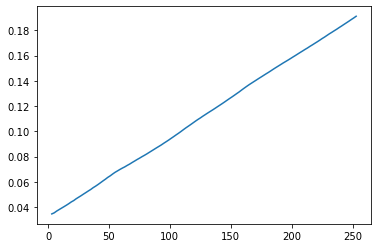

In [51]:
plt.plot(ixs, all_ratios)

In [44]:
filtered_ratios = [all_ratios[ix] for ix in ixs if ix >= 50 and ix <= 150]
filtered_ixs = [ix for ix in ixs if ix >= 50 and ix <= 150]

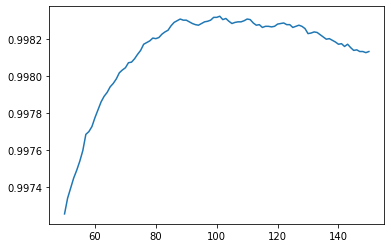

In [45]:
plt.plot(filtered_ixs, filtered_ratios)

In [46]:
np.argmax(all_ratios)

101

In [181]:
img = cv2.imread('c:/Users/ax/retina-unet-master-disc/test/all_predictions.png')
ret_val, img_out = cv2.threshold(img, 98, 255, cv2.THRESH_BINARY)
cv2.imwrite('c:/Users/ax/retina-unet-master-disc/test/all_predictions_bin.png', img_out) 

True

In [47]:
all_ratios[np.argmax(all_ratios)]

0.9983240392774881